In [9]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os, sys
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
load_dotenv()

SAMPLE_SUBMISSION_ROWS = os.environ.get("SAMPLE_SUBMISSION_ROWS")
TRAINING_DATA = os.environ.get("TRAINING_DATA")

In [4]:
# Obtain training data 

df = pd.read_csv(TRAINING_DATA)

df.head()

,ind_recommended,activation,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,...,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
0,0,0,NaN,107.215862,26.686594,74.0,3682.75,138.0,111.0,14.0,...,49466.0,65923.0,0.000000,29.180,58.434969,32.500000,86.0,15.856826,168972,152285
1,0,0,NaN,35.552000,50.928261,3.0,1171.35,23.0,17.0,2.0,...,3638.0,7801.0,0.419355,28.465,5.392089,7.000000,125.0,6.998555,212404,39032
2,0,0,NaN,31.623103,48.837872,19.0,2295.38,47.0,42.0,11.0,...,3912.0,12868.0,0.836364,421.500,33.780445,0.000000,180.0,1.753009,225178,7439
3,0,0,NaN,112.277391,NaN,NaN,NaN,NaN,NaN,16.0,...,28919.0,23553.0,0.952381,50.000,37.340085,28.666667,134.0,9.000063,183948,485069
4,1,0,NaN,448.427273,NaN,NaN,NaN,NaN,NaN,5.0,...,1086.0,308.0,0.754386,69.509,77.794164,15.000000,114.0,1.767939,210107,536004


In [6]:
df.shape[0]

12229978

In [8]:
# Compute the correlation matrix between features

correlation_matrix = df.corr()

correlation_matrix

,ind_recommended,activation,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,...,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
ind_recommended,1.000000,0.003215,0.008588,0.002103,-0.003528,0.042722,0.001908,0.036030,0.046077,0.042028,...,0.035140,0.037333,-0.014259,0.000218,0.056303,0.124680,0.014989,-0.037411,-0.009503,0.001897
activation,0.003215,1.000000,0.025995,-0.003050,-0.007459,0.094103,0.007667,0.076540,0.097470,0.051367,...,0.018727,0.028534,-0.005866,-0.010961,0.047093,0.016338,0.005493,-0.024814,-0.003934,0.000618
customer_digital_activity_04,0.008588,0.025995,1.000000,-0.003088,-0.011475,0.017589,0.001346,0.019339,0.024111,-0.003184,...,0.013788,0.032597,-0.013451,-0.022188,0.001391,0.005630,-0.013428,-0.021298,0.007011,0.005580
customer_spend_01,0.002103,-0.003050,-0.003088,1.000000,0.219168,-0.022321,0.144131,-0.015156,-0.022794,-0.008323,...,-0.000046,-0.001752,-0.008402,0.008095,0.018961,0.010449,0.011822,0.005673,-0.005831,-0.000383
customer_industry_spend_01,-0.003528,-0.007459,-0.011475,0.219168,1.000000,-0.050042,0.370825,-0.034709,-0.047623,0.041602,...,-0.069210,-0.068814,0.000598,0.051305,0.044118,0.008797,0.049894,0.027960,-0.029324,-0.000569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
customer_digital_activity_02,0.124680,0.016338,0.005630,0.010449,0.008797,0.080278,0.026526,0.072514,0.084198,0.140758,...,0.020756,0.009341,0.042050,0.007256,0.118245,1.000000,-0.034319,-0.046590,0.036352,0.000343
customer_profile_04,0.014989,0.005493,-0.013428,0.011822,0.049894,-0.078459,0.013770,-0.040392,-0.039925,0.082770,...,-0.063292,-0.083457,0.003598,0.043974,0.081893,-0.034319,1.000000,-0.084650,-0.616289,-0.000644
distance_05,-0.037411,-0.024814,-0.021298,0.005673,0.027960,-0.073940,-0.005588,-0.064463,-0.079061,-0.054624,...,-0.072124,-0.035129,0.064164,-0.012862,-0.050864,-0.046590,-0.084650,1.000000,0.040072,-0.001205
customer,-0.009503,-0.003934,0.007011,-0.005831,-0.029324,0.047854,-0.006488,0.026652,0.025432,-0.053770,...,0.036796,0.049371,-0.008412,-0.025722,-0.050814,0.036352,-0.616289,0.040072,1.000000,0.000416


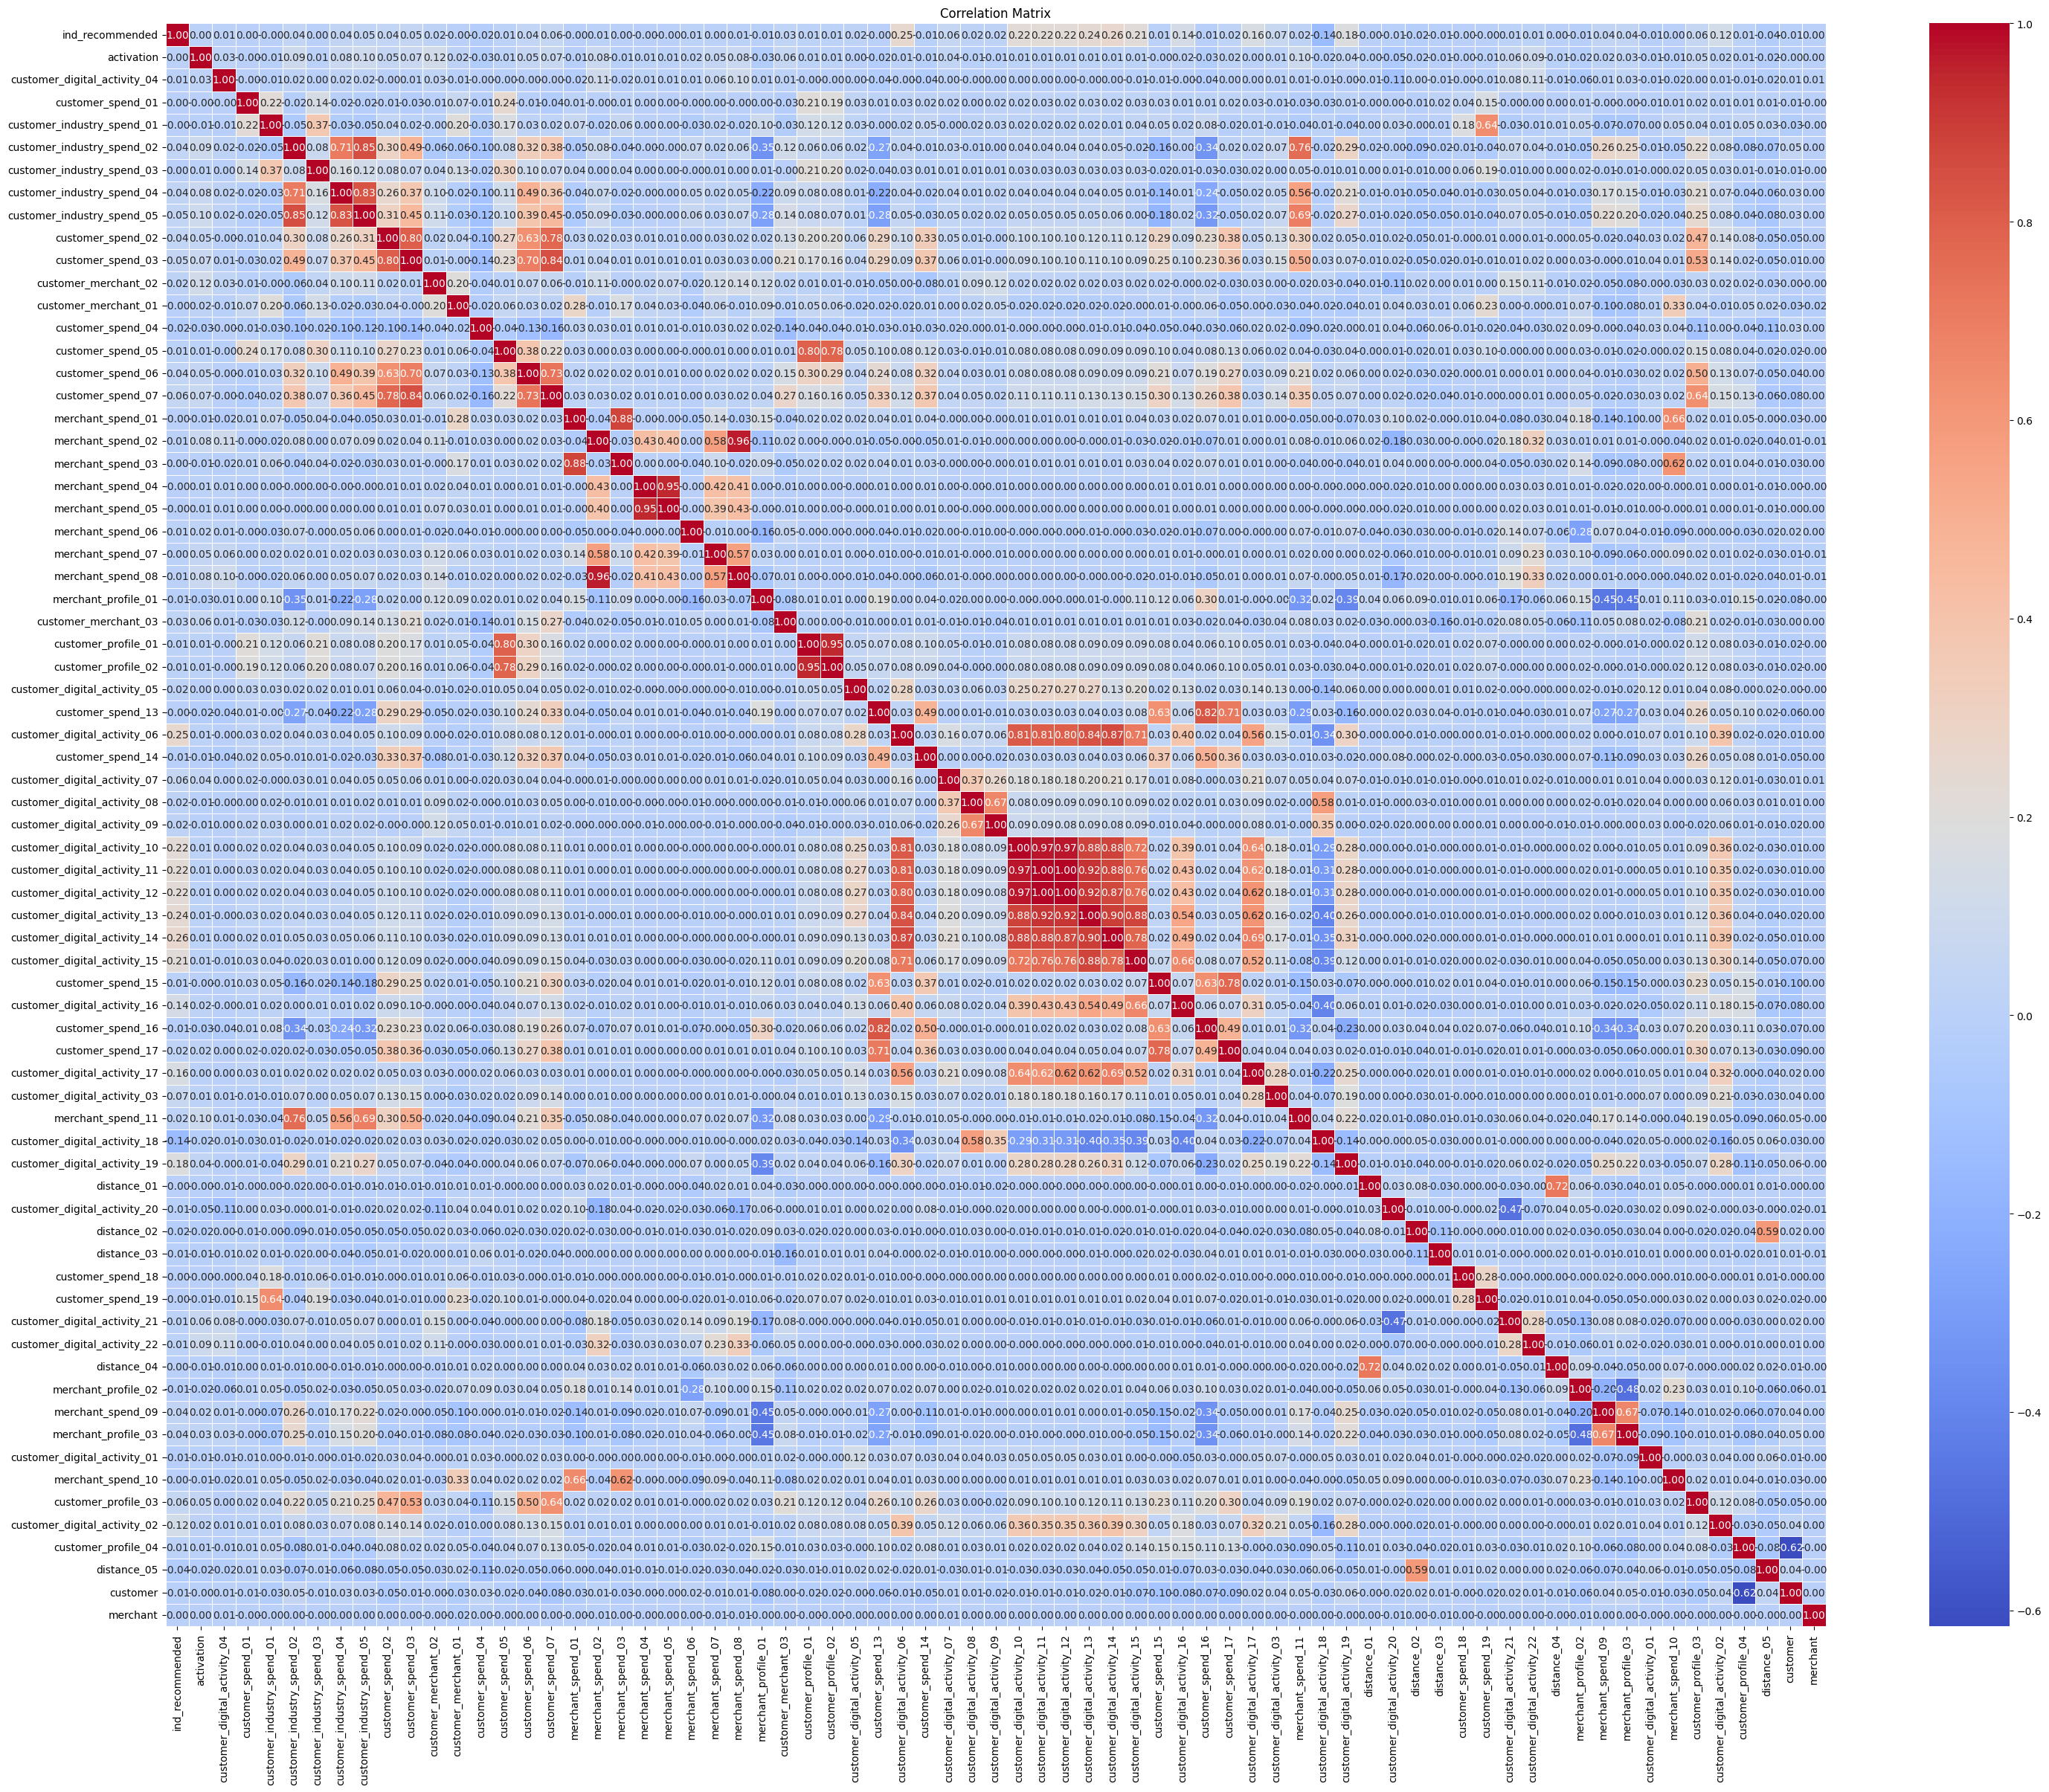

In [12]:
# Visualise the correlation matrix

plt.figure(figsize=(36, 28))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Determine which features have the last null/NaN values

# Count the number of null values in each column
null_counts = df.isnull().sum()

# Sort the columns based on the number of null values in ascending order
sorted_columns = null_counts.sort_values()

# Print the columns with the least null values
print("Columns with the least null values:")
sorted_columns

Columns with the least null values:


ind_recommended                        0
distance_05                            0
customer                               0
merchant                               0
activation                             0
                                  ...   
customer_digital_activity_18    12154010
customer_digital_activity_08    12154010
customer_digital_activity_09    12154010
customer_merchant_01            12219172
customer_merchant_02            12219172
Length: 71, dtype: int64

In [16]:
# Filter the sorted columns to include only those with no null values
no_null_columns = sorted_columns[sorted_columns == 0]

# Print the columns with no null values
print("Columns with no null values:")
print(no_null_columns)

Columns with no null values:
ind_recommended    0
distance_05        0
customer           0
merchant           0
activation         0
dtype: int64
